<a href="https://colab.research.google.com/github/aliroish/Data-Analyst-using-python/blob/main/auto%20practicing%20on%20Coursera%20Course%207%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_excel('/content/auto-mpg .xlsx')

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,1,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,1,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,1,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,1,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,1,ford torino,JEETMEET


In [5]:
df.drop(['origin'],axis=1,inplace=True)

In [ ]:
missing_data=df.isnull()

In [10]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

mpg
False    98
Name: mpg, dtype: int64

cylinders
False    98
Name: cylinders, dtype: int64

displacement
False    98
Name: displacement, dtype: int64

horsepower
False    98
Name: horsepower, dtype: int64

weight
False    98
Name: weight, dtype: int64

acceleration
False    96
True      2
Name: acceleration, dtype: int64

model year
False    96
True      2
Name: model year, dtype: int64

car name
False    98
Name: car name, dtype: int64

CAR Number
False    91
True      7
Name: CAR Number, dtype: int64



In [11]:
mean=df['acceleration'].mean()

In [19]:
df['acceleration'].replace(np.nan,mean,inplace=True)

In [ ]:
df['acceleration'].isnull().value_counts()

In [21]:
mode=df['model year'].mode()[0]
mode

72.0

In [22]:
df['model year'].replace(np.nan,mode,inplace=True)

In [23]:
df['model year'].isnull().value_counts()

False    89
Name: model year, dtype: int64

In [24]:
df.dropna(subset = ['CAR Number'], inplace=True)

In [25]:
df['CAR Number'].isnull().value_counts()

False    89
Name: CAR Number, dtype: int64

In [17]:
df.drop_duplicates(subset =['CAR Number'], inplace=True)

In [18]:
#  Get the basic insights:
# ✔ Display the first five and last five rows
# ✔ Display all the column names in the dataset
# ✔ Display the concise summary of your dataset
# ✔ Display the name of the car with maximum number of horsepower.
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
0,18,8,307.0,130,3504,12.0,70.0,chevrolet chevelle malibu,L6V 043
1,15,8,350.0,165,3693,11.5,70.0,buick skylark 320,RTY079
2,18,8,318.0,150,3436,11.0,70.0,plymouth satellite,MTP600
3,16,8,304.0,150,3433,12.0,70.0,amc rebel sst,MNJ000
4,17,8,302.0,140,3449,10.5,70.0,ford torino,JEETMEET


In [26]:
df.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,CAR Number
93,14,8,318.0,150,4237,14.5,73.0,plymouth fury gran sedan,FGTEE4
94,13,8,440.0,215,4735,11.0,73.0,chrysler new yorker brougham,GTTYR6
95,12,8,455.0,225,4951,11.0,73.0,buick electra 225 custom,TTGGT53
96,13,8,360.0,175,3821,11.0,73.0,amc ambassador brougham,TGTYY67
97,18,6,225.0,105,3121,16.5,73.0,plymouth valiant,HUYT76


In [27]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'car name', 'CAR Number'],
      dtype='object')

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 97
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           89 non-null     int64  
 1   cylinders     89 non-null     int64  
 2   displacement  89 non-null     float64
 3   horsepower    89 non-null     int64  
 4   weight        89 non-null     int64  
 5   acceleration  89 non-null     float64
 6   model year    89 non-null     float64
 7   car name      89 non-null     object 
 8   CAR Number    89 non-null     object 
dtypes: float64(3), int64(4), object(2)
memory usage: 7.0+ KB


In [29]:
df["horsepower"].max()

225

In [31]:
df[df['horsepower'] == 225][["car name","horsepower"]]

,car name,horsepower
8,pontiac catalina,225
13,buick estate wagon (sw),225
95,buick electra 225 custom,225


In [32]:
df['mpg'].dtype

dtype('int64')

In [33]:
df['mpg']=df['mpg'].astype(np.float64)

In [34]:
df['mpg']=235/df['mpg']

In [35]:
df.rename(columns={'mpg':'L/100 Km'},inplace=True)

In [38]:
#Normalize the column “Weight” so that the values range from 0 to 1
df['weight']=df['weight']/df['weight'].max()


In [39]:
#  In our dataset, "horsepower" is a real valued variable ranging from 48 to 288, it
# has 57 unique values. What if we only care about the price difference between
# cars with high horsepower, medium horsepower, and little horsepower (3
# types)? Can we rearrange them into three ‘bins' to simplify analysis?
bins=np.linspace(df['horsepower'].min(),df['horsepower'].max(),4)
bins

array([ 46.        , 105.66666667, 165.33333333, 225.        ])

In [40]:
group_names=['little','medium','high']
df['horsepower-bins']=pd.cut(df['horsepower'],bins,labels=group_names,include_lowest=True)
print(df[['horsepower-bins']])

   horsepower-bins
0           medium
1           medium
2           medium
3           medium
4           medium
..             ...
93          medium
94            high
95            high
96            high
97          little

[89 rows x 1 columns]


In [ ]:
df['horsepower-bins'].value_counts()

little    39
medium    29
high      21
Name: horsepower-bins, dtype: int64

Text(0.5, 1.0, 'horsepower')

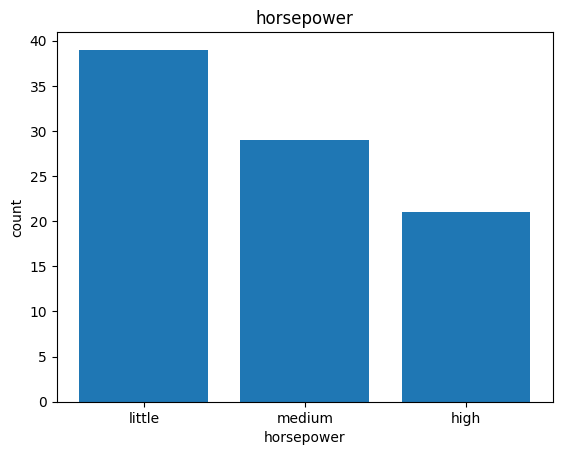

In [46]:
%matplotlib inline
import matplotlib as plt
from matplotlib import pyplot
#plt.pyplot.hist(df["horsepower-bins"])
pyplot.bar(group_names, df["horsepower-bins"].value_counts())
#plt.pyplot.hist(df["horsepower"], bins = 3)

# set x/y labels and plot title
plt.pyplot.xlabel("horsepower")
plt.pyplot.ylabel("count")
plt.pyplot.title("horsepower")